## Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.

### Project Overview

>In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record the time from each condition.


### (1) What is the independent variable? What is the dependent variable?

**Independent variable:** Congruent and Incongruent words conditions.

**Dependent variable:** Time taken to name the ink colors in equally-sized lists of Congruent and Incongruent words.

### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Hypotheses:**

**$H_0$: $\mu_{C} = \mu_{I}$**

**$H_a$: $\mu_{C} \neq \mu_{I}$**

Where:

-$H_0$ represents the null hypothesis

-$H_a$ represents the alternative hypotheses respectively

-$\mu_C$ represents the population average reading time for congruently colored words (C = Congruent)

-$\mu_I$ represents the population average reading time for incongruently colored words (I = Incongruent)

In other Words:

For the null hyposis:

$H_0$: $\mu_{C} - \mu_{I} = 0$

-  It states that there are no differences between the average printed-color identification time for Congruent words vs the printed-color identification time of Incongruent colored words. The mean difference between paired observations is zero.

Alternate Hypothesis:

$H_a$: $\mu_{C} - \mu_{I} \neq 0$ 

-  It states that the difference between the response time for congruent words vs incongruent words is not zero.

**Hypothesis Testing Explanation:**

We need to assign an appropriate hypothesis which will prove and validate the Stroop effect, the Stroop effect suggests that the response time for naming the color is less for the Congruent words than those of the Incongruent words.   
Hence, there must be a difference in the central tendencies of the population from which the sample is derived. The population parameters here are unknown so we can not take the entire population into consideration, we will have to work with the samples in our hands and use the method of hypothesis and statistical testing to infer the results.

**Test Selection:** 

In order to infer the population parameters and accept or reject the null hypothesis from the samples provided, I will perform the two-tailed dependent sample T-test.  
The selection of paired sample T-test is due to the fact that we are comparing the reaction time of a sample from the same population in two different conditions (Congruent & Incongruent word conditions).  
If we got a significant result, we can reject the null hypothesis and accept the alternative hypothesis that there are statistically significant differences between the mean time taken to name ink color between two test conditions.

### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [28]:
# Import the required libraries

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
%matplotlib inline

In [29]:
#read and explore the dataset

df = pd.read_csv("stroopdata.csv")
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [30]:
# I will use Dataframe.describe() method to get the descriptive statistics summary of the dataset

df_summary = df.describe()
df_summary

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [31]:
# Measures of Central Tendency and Variability

congruent_mean = df_summary['Congruent'].loc['mean']
incongruent_mean = df_summary['Incongruent'].loc['mean']
congruent_std = df_summary['Congruent'].loc['std']
incongreunt_std = df_summary['Incongruent'].loc['std']


print("\nThe Mean reading times of the Congruent words is: {:.2f} s".format(congruent_mean))
print("\nThe Mean reading times of the Incongruent words is: {:.2f} s".format(incongruent_mean))
print("\nThe Standard deviation of Congruent reading times: {:.2f} s".format(congruent_std))
print("\nThe Standard deviation of Incongruent reading times: {:.2f} s".format(incongreunt_std))


The Mean reading times of the Congruent words is: 14.05 s

The Mean reading times of the Incongruent words is: 22.02 s

The Standard deviation of Congruent reading times: 3.56 s

The Standard deviation of Incongruent reading times: 4.80 s


### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

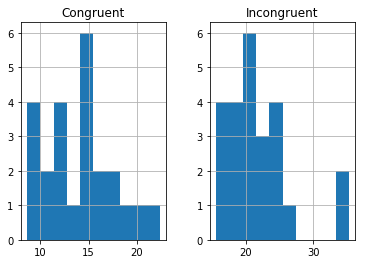

In [32]:
# Build the visualizations here

df.hist();

>The histogram above doesn't infer the shape of the distribution, so I'm going to use distribution plots from seaborn package to compare the two distributions.

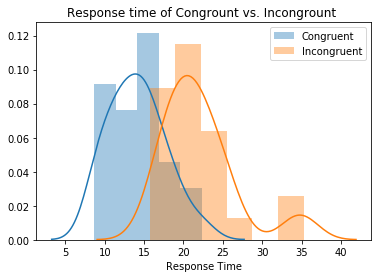

In [33]:
# Plot distributions of Congruent & Incongruent groups

sns.distplot(df['Congruent'],label = "Congruent")
sns.distplot(df['Incongruent'],label = "Incongruent")
plt.xlabel("Response Time")
plt.title("Response time of Congrount vs. Incongrount ")
plt.legend();

In [34]:
# Calculating the median response time of the Incongruent words to help define if the shape of the distribution 
#is skewed to the right or it's normally distributed

incongruent_median = df.Incongruent.median()
print("\nThe Median response time of the Incongruent group is: {} s".format(incongruent_median))


The Median response time of the Incongruent group is: 21.0175 s


**Obervations**

-  **Congruent Group:** The congruent histogram is normally distributed.

-  **Incongruent Group:** The Incongruent distribution looks to be skewed to the right but the mean {incongruent_mean = 22.02} and the median {incongruent_median = 21.02} are close which would indicate a normal distribution the skewness may be due to the presence of outliers on the higher end.

-  Graph infer that Congruent group has a faster response time.


### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [35]:
# Both of our samples have the same size

print(df['Congruent'].size)
print(df['Incongruent'].size)

24
24


In [36]:
# Get the t-critical value for a 95% confidence level and the degrees of freedom (24-1) = 23 d.f.

t.ppf(.95, 23)

1.7138715277470473

-  We need to estimate the difference in means of the two groups:

    means_diff = incongruent_mean - congruent_mean = 22.02 - 14.05 = 7.97

In [37]:
# The standard deviation of the differences of means between the two groups:

df['Difference'] = df['Congruent']-df['Incongruent']
df['Difference'].std(axis=0)

4.8648269103590556

In [38]:
# The t-static will be:

print("T-statistic = {0:.4f}".format(7.97/(4.8648 / math.sqrt(24))))

T-statistic = 8.0260


### Conclusion
T-statistic of 8.0260 is less than the critical value of 1.7139 for 95% confidence level and 23 degrees of freedom.

Hence, we can reject the null hypothesis. This means that it does take much less time to do the congruent task than it does to do the incongruent task. This matches up with what we expected.

### (6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

One plausible explanation for the **Stroop effect** is that humans tend to read words faster than naming colors of the printed words. In other words, if our task is to name the colors and in the meantime ignoring the printed words, then interference is very likely to result.
In contrast, if we reverse the process by saying out the printed words and ignoring the colors, then we are likely to react to the task much easier and quicker. 

A similar task that would result in a similar effect is the **“Numerical Stroop Effect”**: it suggests that incongruent information will require more mental resources to resolve correctly – with numbers this time, rather than words. 
This experiment has shown that, with all else being controlled for, presenting numbers of incongruent sizes next to each other will cause the greatest interference, increasing the delay in reading and comprehension.  
For an example, see the image below:

<img src="numerical-stroop.jpg">



### Resources:

-  [The Stroop Effect – How it Works and Why](https://imotions.com/blog/the-stroop-effect/)    
-  [Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect#Experimental_findings)   
-  [t-tests and Comparing Means - Paired t-tests](http://www.statstutor.ac.uk/topics/t-tests/paired-t-tests/)   
-  [T-Score vs. Z-Score: What’s the Difference?](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/)